In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy.fft import fft2, ifft2
import cv2
import torch
from PIL import Image

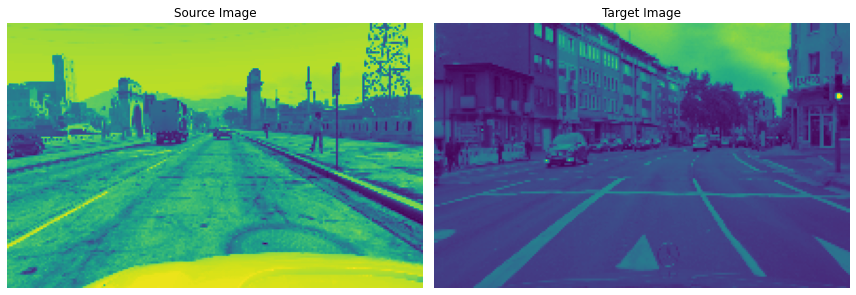

(140, 220)

In [51]:
# Load and display the images
# Load images
source = cv2.imread('/home/robograd/fheman/EE243--Assignment2/A2-Q4 (1)/A2-Q4 (1)/A2-Q4/source.png')
target = cv2.imread('/home/robograd/fheman/EE243--Assignment2/A2-Q4 (1)/A2-Q4 (1)/A2-Q4/target.png')
# Convert images to grayscale
source_gray = cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)
target_gray = cv2.cvtColor(target, cv2.COLOR_RGB2GRAY)

source_r = cv2.resize(source_gray, (220, 140))
target_r = cv2.resize(target_gray, (220, 140))
# Display images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(source_r)
plt.title("Source Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(target_r)
plt.title("Target Image")
plt.axis('off')

plt.tight_layout()
plt.show()
source_r.shape

In [74]:
def fourier_domain_adaptation(source_img, target_img, beta=0.001):
    # Compute FFT of source and target images
    source_fft = np.fft.fft2(source_img)
    target_fft = np.fft.fft2(target_img)

    # Swap low-frequency components
    rows, cols = source_fft.shape
    mask = np.ones((rows, cols))
    mask[int(beta * rows):int((1 - beta) * rows), int(beta * cols):int((1 - beta) * cols)] = 0
    source_fft_swapped = target_fft * mask + source_fft * (1 - mask)

    # Reconstruct images using inverse FFT
    swapped_img = np.fft.ifft2(source_fft_swapped).real

    return swapped_img.astype(np.uint8)


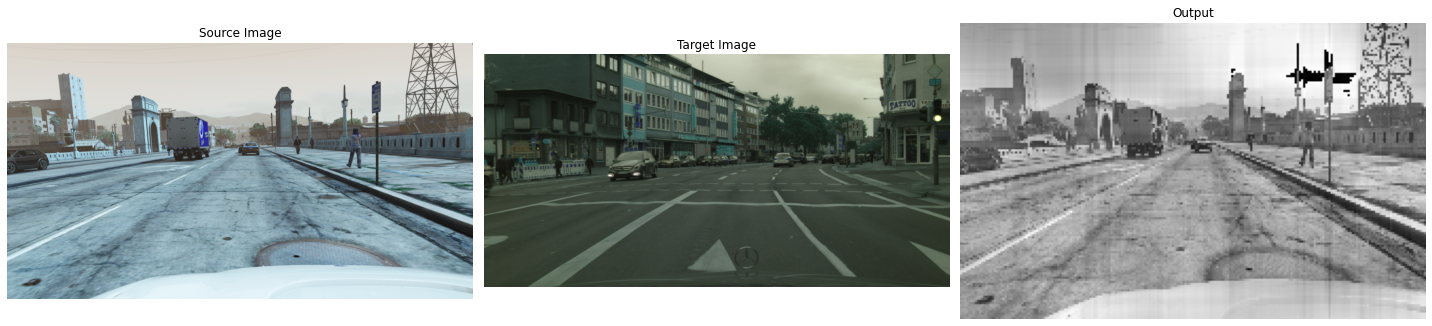

In [77]:
final_img_gray = fourier_domain_adaptation(source_r, target_r)
final = cv2.cvtColor(final_img_gray, cv2.COLOR_GRAY2RGB)
# Display images
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(source)
plt.title("Source Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(target)
plt.title("Target Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final)
plt.title("Output")
plt.axis('off')

plt.tight_layout()
plt.show()